In [137]:
import pandas as pd
import numpy as np

In [138]:
blogs = pd.read_csv("blogs.csv")

In [139]:
blogs

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [140]:
blogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [141]:
blogs['Labels'].nunique()

20

In [142]:
blogs['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

#Preprocess Dataset

In [143]:
import re
import string

In [144]:
def clean_text(text):
  text = text.lower() #makes text lowercase
  text = re.sub('\[.*?\]','', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub("[0-9" "]+"," ",text)
  text = re.sub('[‘’“”…]', '', text)
  return text

clean = lambda x: clean_text(x)

In [145]:
blogs['Data'] = blogs.Data.apply(clean)
blogs.Data

,Data
0,path \nfrom frank odwyer\nnewsgroups altathei...
1,newsgroups altatheism\npath \nfrom bilokcforum...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path \nfrom jbrownbatmanbmdtrwcom\nnewsgroups ...
4,xref cantaloupesrvcscmuedu \nnewsgroups alta...
...,...
1995,xref cantaloupesrvcscmuedu \npath \nfrom fr...
1996,xref cantaloupesrvcscmuedu \nnewsgroups talk...
1997,xref cantaloupesrvcscmuedu \npath cantaloupes...
1998,xref cantaloupesrvcscmuedu \npath cantaloupes...


In [146]:
#Word frequency
freq = pd.Series(' '.join(blogs['Data']).split()).value_counts()[:20] # for top 20
freq

,count
the,26780
to,13429
of,12697
a,11214
and,10863
in,9068
i,8155
is,7970
that,7092
it,5509


#Removing stopwords

In [147]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
#removing stopwords
from nltk.corpus import stopwords

stop = stopwords.words('english')
blogs['Data'] = blogs['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [149]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(blogs['Data']).split()).value_counts()[:20] # for top 20
freq_Sw

,count
subject,2170
lines,2086
date,2083
path,2046
newsgroups,2038
messageid,2006
organization,1979
apr,1940
gmt,1785
one,1588


#Feature Extraction

In [150]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(blogs["Data"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
print(word_freq_df.sort_values('occurrences',ascending = False).head())

          term  occurrences  frequency
14432      gmt         1785   0.005731
24666      one         1588   0.005098
38439    would         1580   0.005072
38494   writes         1523   0.004889
1958   article         1293   0.004151


In [151]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,9,0.000029
1,aaa,3,0.000010
2,aaaaarrrrgh,1,0.000003
3,aaboston,1,0.000003
4,aalternate,1,0.000003
5,aaltonen,3,0.000010
6,aam,1,0.000003
7,aan,6,0.000019
8,aangegeven,1,0.000003
9,aantal,1,0.000003


In [152]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer

#initialize object
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(blogs["Data"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [153]:
df

,able,accept,access,according,account,act,action,actions,actually,add,...,xref,yeah,year,years,yes,york,youll,young,youre,youve
0,0.0,0.053795,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045314,0.0,0.0,0.0,0.000000,0.057375
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.111891,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.108118,0.000000,0.000000,...,0.000000,0.333197,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.082636,0.000000
3,0.0,0.024288,0.0,0.0,0.023592,0.025378,0.127914,0.103619,0.038420,0.000000,...,0.000000,0.000000,0.018922,0.017126,0.122754,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.227837,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.038814,0.000000,0.000000,0.053550,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.000000,0.0,0.0,0.000000,0.042821,0.000000,0.000000,0.032413,0.000000,...,0.020945,0.000000,0.000000,0.028897,0.069042,0.0,0.0,0.0,0.033408,0.087420
1996,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071218,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1997,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.096870,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1998,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.179264,0.113326,...,0.057918,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


# Applying naive bayes for classification

In [154]:
def split_into_words(i):
  return (i.split(" "))

In [155]:
from sklearn.model_selection import train_test_split

X=blogs['Data']
Y=blogs['Labels']
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [156]:
# Preparing email texts into word count matrix format
blogs_bow = CountVectorizer(analyzer=split_into_words).fit(blogs.Data)

# For all data
all_blogs_matrix = blogs_bow.transform(blogs.Data)
print(all_blogs_matrix.shape)

# For training data
train_blogs_matrix = blogs_bow.transform(x_train)
print(train_blogs_matrix.shape)

# For testing data
test_blogs_matrix = blogs_bow.transform(x_test)
print(test_blogs_matrix.shape)


(2000, 39214)
(1400, 39214)
(600, 39214)


In [157]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [158]:
# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_blogs_matrix, y_train.values) #training
train_pred_m = classifier_mb.predict(train_blogs_matrix) #predicting on train data
accuracy_train_m = np.mean(train_pred_m==y_train.values) #training accuracy

test_pred_m = classifier_mb.predict(test_blogs_matrix) #predicting on test data
accuracy_test_m = np.mean(test_pred_m==y_test.values) #testing accuracy


In [159]:
accuracy_train_m

0.9935714285714285

In [160]:
accuracy_test_m

0.7183333333333334

In [161]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for Multinomial Naive Bayes
precision_m = precision_score(y_test, test_pred_m, average='weighted') # Using 'weighted' for multi-class classification
recall_m = recall_score(y_test, test_pred_m, average='weighted')
f1_m = f1_score(y_test, test_pred_m, average='weighted')

print("Multinomial Naive Bayes:")
print("Precision:", precision_m)
print("Recall:", recall_m)
print("F1-score:", f1_m)

Multinomial Naive Bayes:
Precision: 0.8066476791546611
Recall: 0.7183333333333334
F1-score: 0.7289936352264514


In [162]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(train_blogs_matrix.toarray(),y_train.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_blogs_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==y_train.values)

test_pred_g = classifier_gb.predict(test_blogs_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==y_test.values)

In [163]:
accuracy_train_g

1.0

In [164]:
accuracy_test_g

0.6083333333333333

In [165]:
# Calculate precision, recall, and F1-score for Gaussian Naive Bayes
precision_g = precision_score(y_test, test_pred_g, average='weighted') # Using 'weighted' for multi-class classification
recall_g = recall_score(y_test, test_pred_g, average='weighted')
f1_g = f1_score(y_test, test_pred_g, average='weighted')

print("Multinomial Naive Bayes:")
print("Precision:", precision_g)
print("Recall:", recall_g)
print("F1-score:", f1_g)

Multinomial Naive Bayes:
Precision: 0.6522391376768863
Recall: 0.6083333333333333
F1-score: 0.6101835582267003


Evaluation: Multimodal Naive Bayes performs better on test dataset than Gaussian Naive Bayes.

#Sentiment Analysis

In [166]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [167]:
#making new datatframe because we want punctuation
data = pd.read_csv("blogs.csv")

In [168]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

data['Data'] = data['Data'].str.strip()  # Remove leading/trailing whitespace
data_list = data['Data'].tolist()  # Convert to a list

data_list[0:10]

['Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK

In [169]:
import nltk #used for tokenization
nltk.download('punkt')
nltk.download('punkt_tab')
# Preprocess blogs_list to handle potential empty strings or other issues:
#data_list = [text for text in data_list if text.strip()]  # Remove empty strings
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data_list)) #convert dataframe into strings and then tokenize into sentences
sentences[5:15]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


["I'd say the majority of people have a moral system that instructs them\nto kill under certain circumstances.",
 "I do get your distinction between\nmotivate and allow, and I do agree that if a flavour of theism 'allows'\natoricities, then that's an indictment of that theism.",
 "But it rather\ndepends on what the 'certain circumstances' are.",
 'When you talk about\nChristianity, or Islam, then at least your claims can be understood.',
 "It's when people go to a general statement about theism that it falls\napart.",
 'One could believe in a God which instructs one to be utterly\nharmless.',
 '#\n#|> For my part, I conclude that something\n#|> else is required.',
 'I also happen to believe that that something\n#|> else will work no less well without religion - any easy Them/Us will\n#|> do.',
 '#\n#And what does religion supply, if not an easy Them/Us?',
 'Not necessarily.']

In [170]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,"#|> \n#|> No, but it allows one to conclude th..."
2,"#\n#""Motivates"" or ""allows?"""
3,The Christian Bible says that one may kill\n#u...
4,"In fact, it instructs one to kill under\n#cert..."
...,...
33919,Any evidence to the contrary ?
33920,"Bill R.\n\n--\n\n""When up a dangerous faction ..."
33921,"To ruin, slaughter, and confound; ..."
33922,"When such a tempest shook the land,\nHow could..."


In [171]:
#same afinn list but converted to dictionary form
affinity_scores = afinn.set_index('word')['value'].to_dict() #value is score or weight of word

In [172]:
#Custom function :score each word in a sentence in lemmatised form,
import spacy
nlp = spacy.load("en_core_web_sm")

sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence: #pick each word in sentence
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #get lemmatized form of word and then get sentiment. then add to sent_score
    return sent_score

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [173]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [174]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [175]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value
14233,"I think it's important, as I ask young people ...",13
9713,horn buttons behind air bag in spokes and not ...,13
14556,:)\n\nI'm glad Grant Fuhr will never be as ove...,13
12849,After falling short two years in a row in exci...,14
25888,"Such a move would save Israeli lives,\nadvance...",15
19442,"Still,\nI think the profile of the person who ...",18
30688,"I, myself, have spent a good deal of time tryi...",18
14491,"Here is the scoring:\n\nPick 1st round winner,...",22
13725,Try these stats (taken from Playboy Magazine\n...,24
12983,>>Lesse:\n>> '93 offense = '92 offen...,24


In [176]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

,sentiment_value
count,33924.000000
mean,0.075463
std,2.013813
min,-93.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,24.000000


In [177]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()  #neutral and negative

,sentence,sentiment_value
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
1,"#|> \n#|> No, but it allows one to conclude th...",-1
3,The Christian Bible says that one may kill\n#u...,-2
4,"In fact, it instructs one to kill under\n#cert...",-2
5,I'd say the majority of people have a moral sy...,-2


In [185]:
sent_df[sent_df['sentiment_value']>=20].head() #very happy customer

,sentence,sentiment_value,index
12983,>>Lesse:\n>> '93 offense = '92 offen...,24,12983
13725,Try these stats (taken from Playboy Magazine\n...,24,13725
14491,"Here is the scoring:\n\nPick 1st round winner,...",22,14491


In [179]:
sent_df['index']=range(0,len(sent_df))

<ipython-input-180-c685e48d54df>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value']) #plotting sentiments


<Axes: xlabel='sentiment_value', ylabel='Density'>

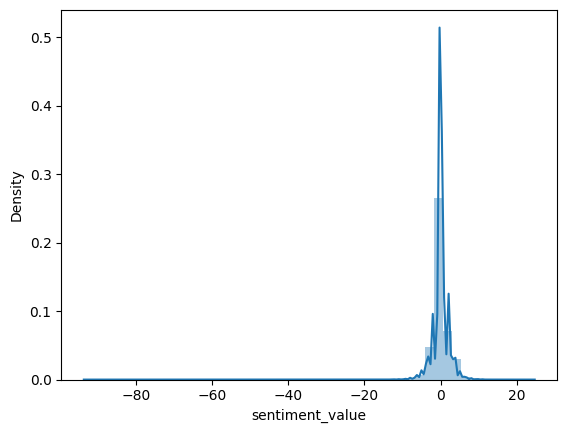

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) #plotting sentiments

<Axes: xlabel='index', ylabel='sentiment_value'>

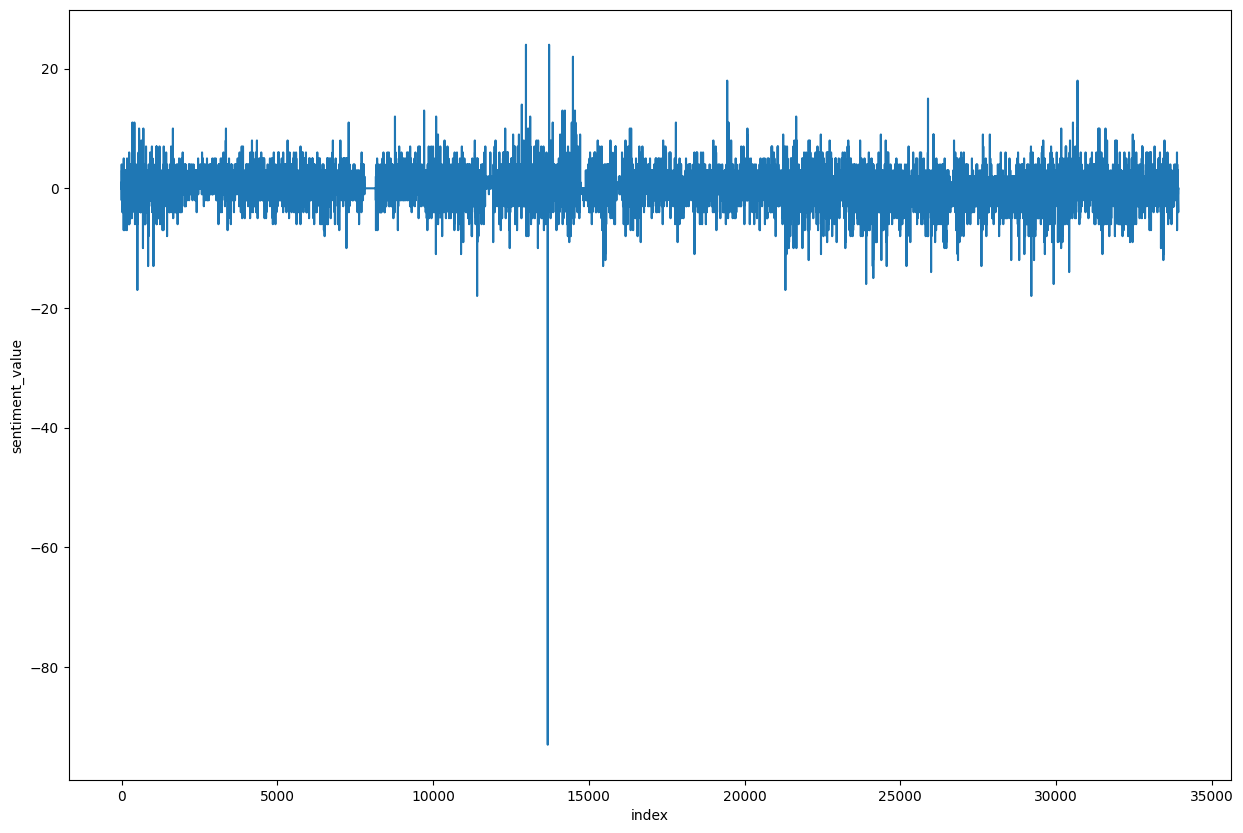

In [181]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) #timeseries order of sentiments. aka plot of change in sentiment over time

Sentiment results: mostly neutral. Hence majority of content is neutral sentiment